# 🧠 Análisis de Personalidad: Extroversión vs. Introversión
#### **Un enfoque basado en datos**

## Objetivo General

**Analizar patrones de comportamiento social y digital para identificar su relación con rasgos de personalidad, y desarrollar un modelo predictivo robusto que permita su implementación en entornos interactivos.**

## Pregunta problema
**¿Qué variables del comportamiento social y digital predicen mejor si una persona es introvertida o extrovertida?**

## Hipótesis
*	**H1: Las personas extrovertidas asisten a más eventos sociales, tienen más amigos cercanos y publican más en redes sociales.**
*	**H2: Las personas introvertidas pasan más tiempo solas y se sienten agotadas tras socializar.**
*	**H3: El modelo de machine learning puede clasificar correctamente a los individuos con al menos un 80% de precisión.**

## Diccionario

 *  **Time_spent_Alone: Horas diarias que pasa solo (0–11)**
 *  **Stage_fear: Miedo a hablar en público**
 *  **Social_event_attendance: Frecuencia de asistencia a eventos sociales**
 *  **Going_outside: Frecuencia de salir de casa**
 *  **Drained_after_socializing: Si se siente agotado después de socializar**
 *  **Friends_circle_size: Número de amigos cercanos**
 *  **Post_frequency: Frecuencia de publicaciones en redes sociales**
 *  **Personality: Extrovertido / Introvertido**

## Exploración inicial y limpieza

In [45]:
# Librerías Necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga del dataset

df = pd.read_csv(r'C:\Users\Dario\Desktop\personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
# informacion del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [4]:
# Dimencionalidad del dataset

df.shape

(2900, 8)

In [5]:
# Distribucion del dataset

df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2837.0,NaN,NaN,NaN,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
Stage_fear,2827,2,No,1417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Social_event_attendance,2838.0,NaN,NaN,NaN,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
Going_outside,2834.0,NaN,NaN,NaN,3.0,2.247327,0.0,1.0,3.0,5.0,7.0
Drained_after_socializing,2848,2,No,1441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Friends_circle_size,2823.0,NaN,NaN,NaN,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
Post_frequency,2835.0,NaN,NaN,NaN,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0
Personality,2900,2,Extrovert,1491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Duplicados

df.duplicated().sum()

np.int64(388)

In [7]:
# Filas duplicadas

df[df.duplicated()]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
47,10.0,Yes,1.0,2.0,Yes,2.0,0.0,Introvert
217,5.0,Yes,2.0,0.0,Yes,2.0,0.0,Introvert
246,9.0,Yes,0.0,1.0,Yes,2.0,1.0,Introvert
248,9.0,Yes,0.0,2.0,Yes,3.0,2.0,Introvert
254,7.0,Yes,0.0,0.0,Yes,3.0,2.0,Introvert
...,...,...,...,...,...,...,...,...
2884,11.0,Yes,0.0,2.0,Yes,3.0,1.0,Introvert
2890,8.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert


In [8]:
# Conteo de nulos

df.isnull().sum().sort_values(ascending=False)

Friends_circle_size          77
Stage_fear                   73
Going_outside                66
Post_frequency               65
Time_spent_Alone             63
Social_event_attendance      62
Drained_after_socializing    52
Personality                   0
dtype: int64

In [9]:
# Porcentaje de nulos faltantes por columna

(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Friends_circle_size          2.655172
Stage_fear                   2.517241
Going_outside                2.275862
Post_frequency               2.241379
Time_spent_Alone             2.172414
Social_event_attendance      2.137931
Drained_after_socializing    1.793103
Personality                  0.000000
dtype: float64

In [10]:
# Tratamiento de nulos

# Numéricos:

df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median())
df['Social_event_attendance'] = df['Social_event_attendance'].fillna(df['Social_event_attendance'].median())
df['Going_outside'] = df['Going_outside'].fillna(df['Going_outside'].median())
df['Friends_circle_size'] = df['Friends_circle_size'].fillna(df['Friends_circle_size'].median())
df['Post_frequency'] = df['Post_frequency'].fillna(df['Post_frequency'].median())

# Categóricos:

df['Stage_fear'] = df['Stage_fear'].fillna(df['Stage_fear'].mode()[0])
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0])
df['Personality'] = df['Personality'].fillna(df['Personality'].mode()[0])

In [11]:
df.isnull().sum().sort_values()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [12]:
# homogeneización de columnas categóricas

df['Stage_fear'] = df['Stage_fear'].str.strip().str.capitalize()
df['Drained_after_socializing'] = df['Drained_after_socializing'].str.strip().str.capitalize()
df['Personality'] = df['Personality'].str.strip().str.capitalize()

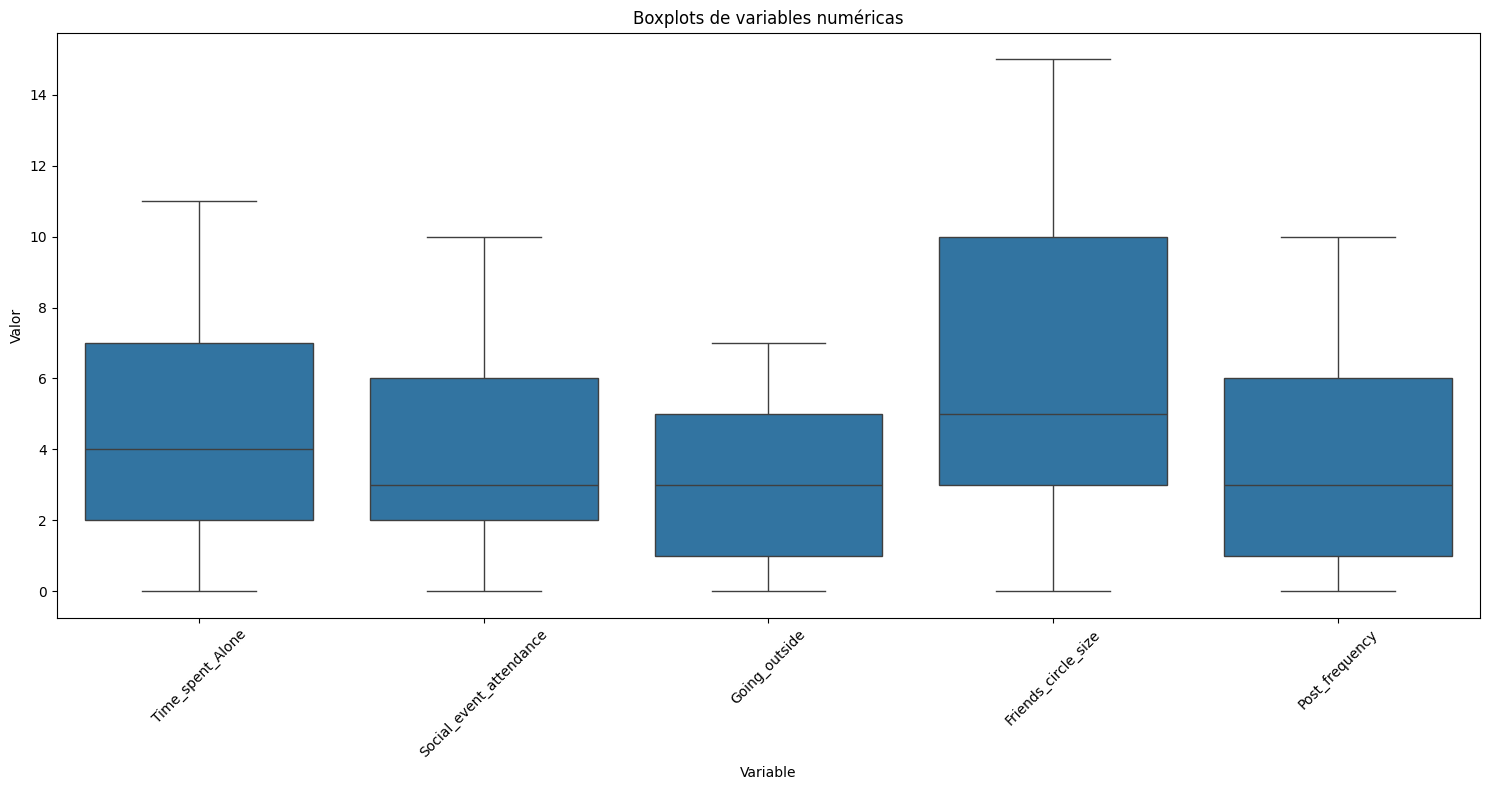

In [13]:
# Detección de Outliers boxplot

# Columnas numéricas

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tamaño del gráfico

plt.figure(figsize=(15, 8))

# Transformacion melt

df_melted = df[num_cols].melt(var_name='Variable', value_name='Valor')

# Boxplot masivo
sns.boxplot(x='Variable', y='Valor', data=df_melted)
plt.xticks(rotation=45)
plt.title("Boxplots de variables numéricas")
plt.tight_layout()
plt.show()

In [14]:
# Detección IQR

# Columnas numéricas

cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

# Cálculo de IQR
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Detección de outliers
outliers = ((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR)))

# Cantidad de outliers por variable
outliers.sum().sort_values(ascending=False)

Time_spent_Alone           0
Social_event_attendance    0
Going_outside              0
Friends_circle_size        0
Post_frequency             0
dtype: int64

In [15]:
# Renombramiento de columnas

df.rename(columns={
    'Time_spent_Alone': 'Tiempo_Solo',
    'Stage_fear': 'Miedo_Escenico',
    'Social_event_attendance': 'Eventos_Sociales',
    'Going_outside': 'Salir',
    'Drained_after_socializing': 'Agotado_Socializar',
    'Friends_circle_size': 'Amigos_Cercanos',
    'Post_frequency': 'Frecuencia_Posts',
    'Personality': 'Personalidad'
}, inplace=True)

In [16]:
# Conversión de valores

cols_numericas = ['Tiempo_Solo', 'Eventos_Sociales', 'Salir', 'Amigos_Cercanos', 'Frecuencia_Posts']
df[cols_numericas] = df[cols_numericas].astype(int)

In [17]:
cols_binarias = ['Miedo_Escenico', 'Agotado_Socializar']
for col in cols_binarias:
    df[col] = df[col].map({'Yes': 'Sí', 'No': 'No'})

In [18]:
df['Personalidad'] = df['Personalidad'].map({
    'Extrovert': 'Extrovertido',
    'Introvert': 'Introvertido'
})
df.head()

,Tiempo_Solo,Miedo_Escenico,Eventos_Sociales,Salir,Agotado_Socializar,Amigos_Cercanos,Frecuencia_Posts,Personalidad
0,4,No,4,6,No,13,5,Extrovertido
1,9,Sí,0,0,Sí,0,3,Introvertido
2,9,Sí,1,2,Sí,5,2,Introvertido
3,0,No,6,7,No,14,8,Extrovertido
4,3,No,9,4,No,8,5,Extrovertido


## Análisis Exploratorio de Datos (EDA)

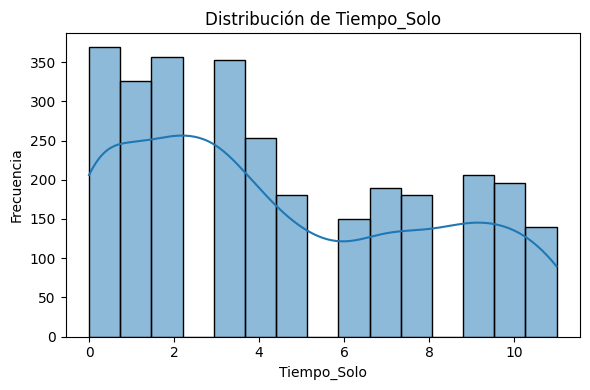

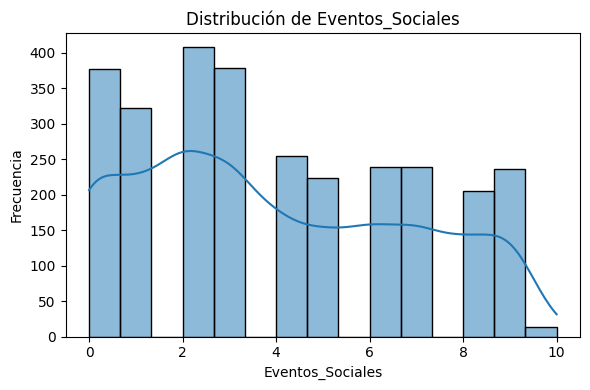

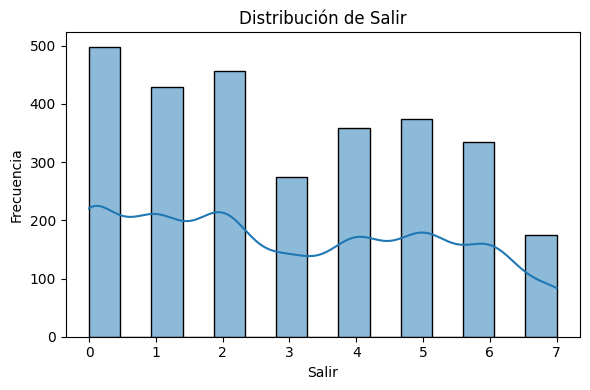

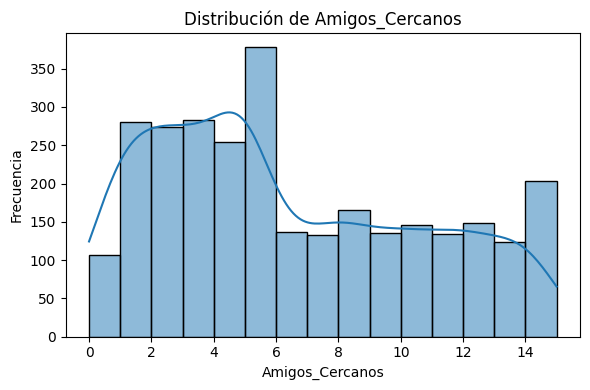

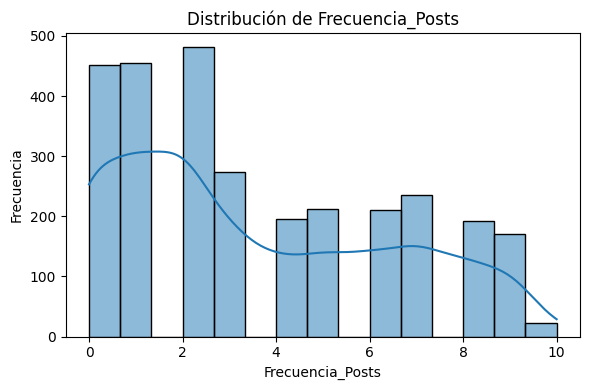

In [19]:
# Distribuciones individuales

for var in cols_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True, bins=15)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

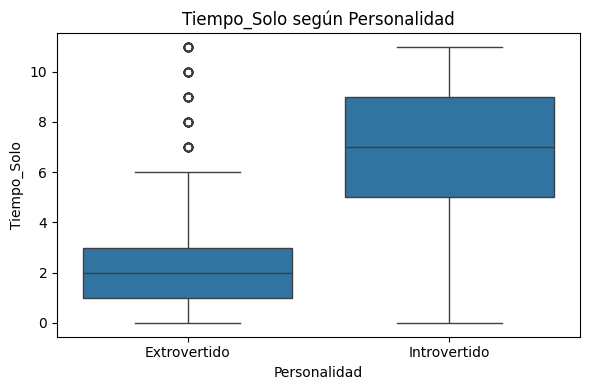

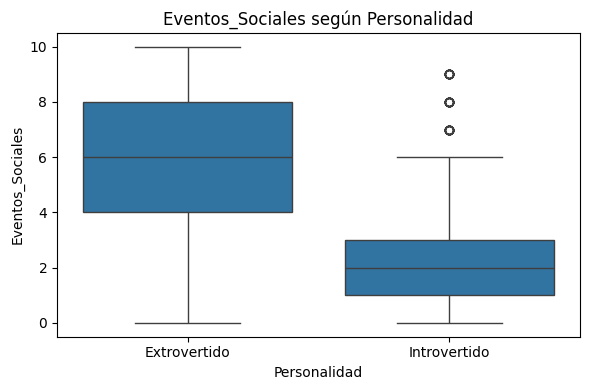

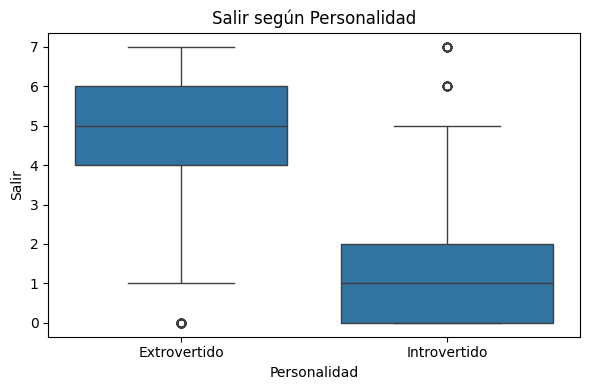

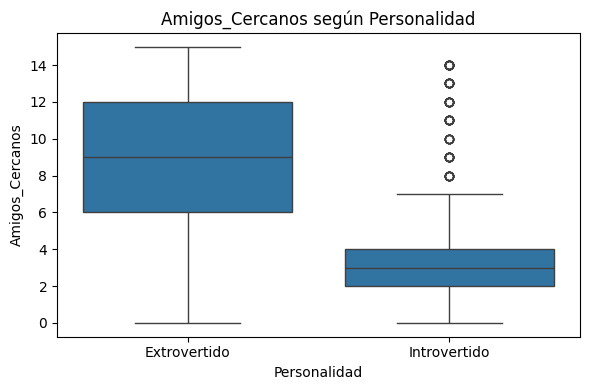

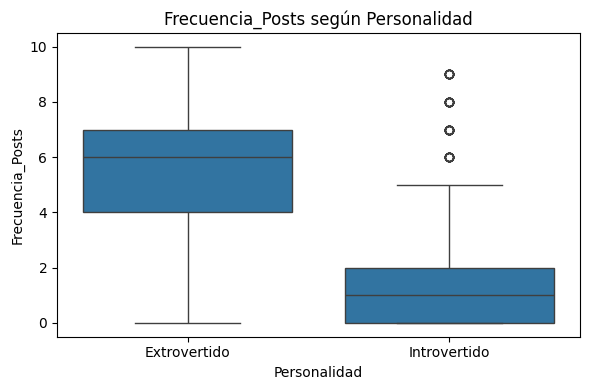

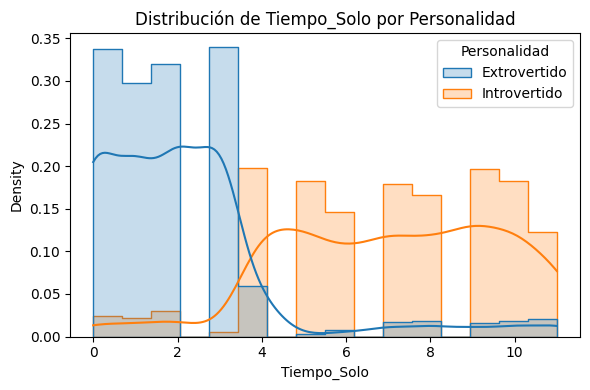

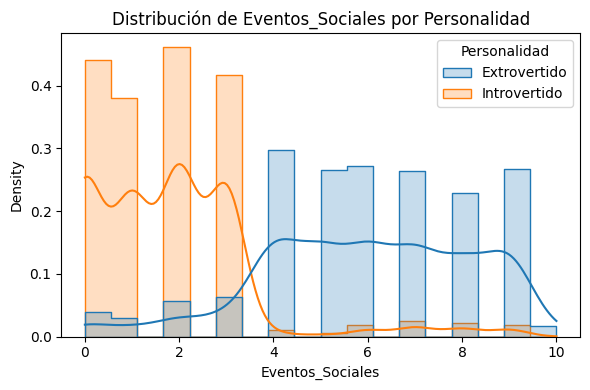

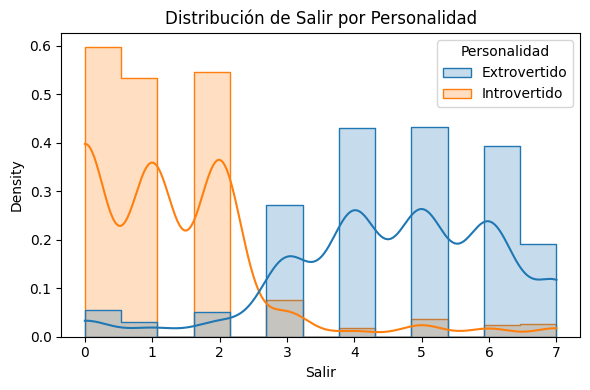

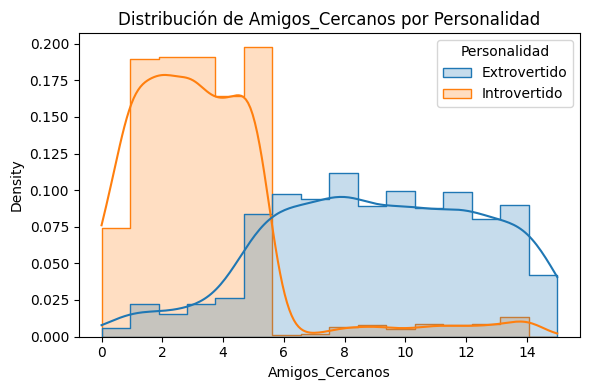

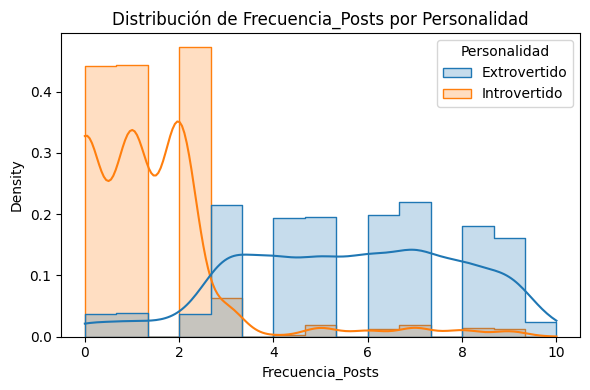

In [20]:
# Comparación por personalidad

# Boxplots por grupo de personalidad
for var in cols_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Personalidad', y=var)
    plt.title(f'{var} según Personalidad')
    plt.tight_layout()
    plt.show()

# Histogramas comparativos
for var in cols_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, hue='Personalidad', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribución de {var} por Personalidad')
    plt.tight_layout()
    plt.show()

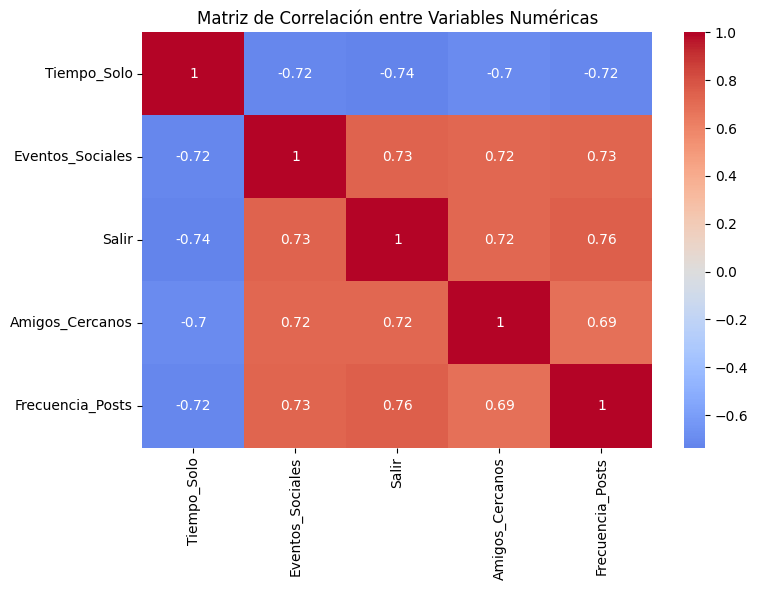

In [21]:
# Correlación entre variables numéricas

corr = df[cols_numericas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

In [22]:
# Patrones visibles

df.groupby('Personalidad')[cols_numericas].mean().round(2)

,Tiempo_Solo,Eventos_Sociales,Salir,Amigos_Cercanos,Frecuencia_Posts
Personalidad,,,,,
Extrovertido,2.11,5.96,4.60,9.06,5.58
Introvertido,7.02,1.81,1.31,3.24,1.41


* **Se analizó la distribución y comportamiento de variables clave para comparar personas introvertidas y extrovertidas. A través de histogramas y boxplots se identificaron algunos valores extremos, pero se conservaron por representar conductas reales.**
* **Las comparaciones por grupo mostraron patrones esperables: los introvertidos pasan más tiempo solos, participan menos en eventos, salen menos, tienen menos amigos y publican poco. Los extrovertidos exhiben el comportamiento opuesto.**
* **La matriz de correlación confirmó que mayor actividad social se asocia con más salidas, más amigos y mayor frecuencia de publicación, mientras que el tiempo en soledad se relaciona negativamente con todas estas conductas.**
* **En conjunto, el análisis validó las hipótesis iniciales y dejó los datos listos para modelar con una base sólida.**

## Modelado predictivo

In [23]:
# Preparación de datos

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_modelo = df[['Tiempo_Solo', 'Miedo_Escenico', 'Eventos_Sociales', 'Salir',
                'Agotado_Socializar', 'Amigos_Cercanos', 'Frecuencia_Posts', 'Personalidad']].copy()

In [24]:
# Codificación de variables categóricas (Sí/No y Extrovertido/Introvertido)


le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

df_modelo['Miedo_Escenico'] = le1.fit_transform(df_modelo['Miedo_Escenico'])         # Sí = 1, No = 0
df_modelo['Agotado_Socializar'] = le2.fit_transform(df_modelo['Agotado_Socializar']) # Sí = 1, No = 0
df_modelo['Personalidad'] = le3.fit_transform(df_modelo['Personalidad'])             # Extrovertido=0, Introvertido=1


In [25]:
# Inverción de la codificación de personalidad.

df_modelo['Personalidad'] = 1 - df_modelo['Personalidad']

In [26]:
# Separación de variables

X = df_modelo.drop(columns='Personalidad')
y = df_modelo['Personalidad']


In [27]:
# División en entrenamiento y testeo


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [28]:
# Guardado de columnas

columnas_ordenadas = X_train.columns.tolist()

In [29]:
# Preprocesamiento

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

In [30]:
# División de columnas


num_cols = ['Tiempo_Solo', 'Eventos_Sociales', 'Salir', 'Amigos_Cercanos', 'Frecuencia_Posts']
bin_cols = ['Miedo_Escenico', 'Agotado_Socializar']

In [31]:
# Escalamiento de columnas numéricas

preprocessor = make_column_transformer(
    (StandardScaler(), num_cols),
    remainder='passthrough'  # No modifica las columnas binarias
)

In [32]:
# Comparación de modelos


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [33]:
# Definición de clasificadores


modelos = {
    "LogisticReg (Calibrated)": CalibratedClassifierCV(LogisticRegression(class_weight='balanced'), cv=3),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "LogisticReg (Simple)": LogisticRegression(class_weight='balanced')
}

resultados = {}

In [34]:
# Entrenamiento de modelos y guardado 


for nombre, clf in modelos.items():
    pipeline = make_pipeline(preprocessor, clf)  
    pipeline.fit(X_train, y_train)               
    y_pred = pipeline.predict(X_test)           
    y_proba = pipeline.predict_proba(X_test)[:, 1]  
    resultados[nombre] = {
        "modelo": pipeline,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba)
    }

In [35]:
# Creacion de un DataFrame con las métricas de todos los modelos

df_resultados = pd.DataFrame([
    {"Modelo": nombre,
     "Accuracy": res["accuracy"],
     "Precision": res["precision"],
     "Recall": res["recall"],
     "F1 Score": res["f1"],
     "ROC AUC": res["roc_auc"]}
    for nombre, res in resultados.items()
]).set_index("Modelo").sort_values(by="F1 Score", ascending=False)

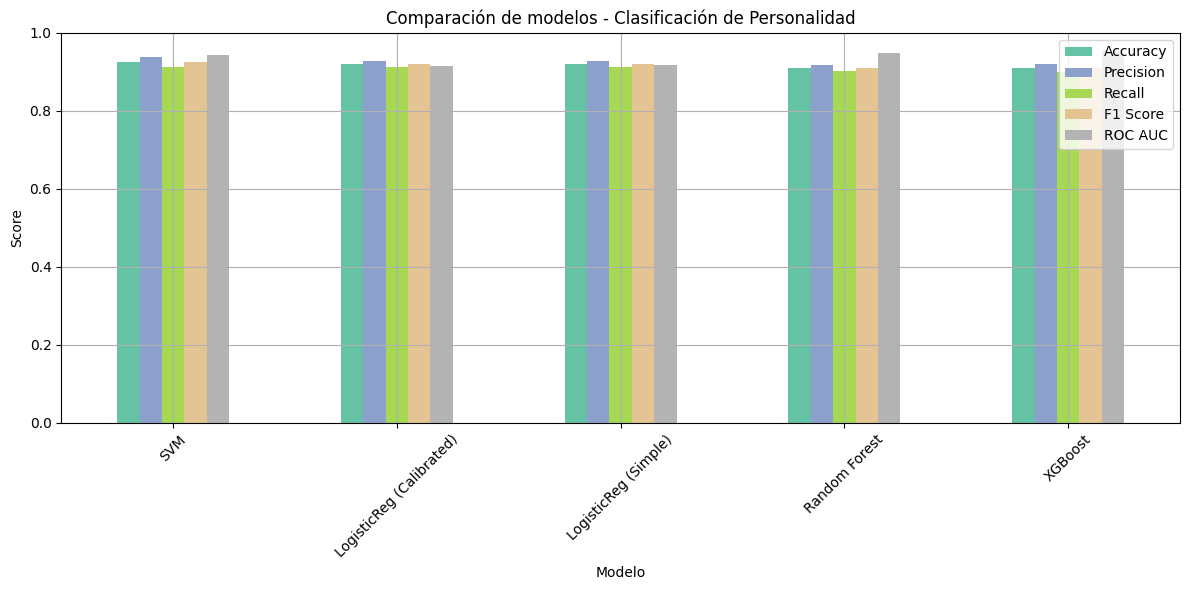

                          Accuracy  Precision    Recall  F1 Score   ROC AUC
Modelo                                                                     
SVM                       0.924138   0.937931  0.912752  0.925170  0.943102
LogisticReg (Calibrated)  0.918966   0.928328  0.912752  0.920474  0.914947
LogisticReg (Simple)      0.918966   0.928328  0.912752  0.920474  0.917815
Random Forest             0.908621   0.918089  0.902685  0.910321  0.947177
XGBoost                   0.908621   0.920962  0.899329  0.910017  0.953716


In [36]:
# Gráfico de barras para comparar las métricas de cada modelo


df_resultados.plot(kind='bar', figsize=(12,6), ylim=(0,1), colormap='Set2')
plt.title("Comparación de modelos - Clasificación de Personalidad")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print(df_resultados)

In [37]:
# Elección el modelo con mayor F1 Score


from sklearn.metrics import classification_report, confusion_matrix, roc_curve

mejor_nombre = df_resultados.index[0]
modelo = resultados[mejor_nombre]["modelo"]

print(f"\n Modelo seleccionado automáticamente: {mejor_nombre}")


 Modelo seleccionado automáticamente: SVM


In [38]:
# Predicciones y probabilidades del mejor modelo


y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]

In [39]:
# Reporte de clasificación completo


print(f"\n Reporte de Clasificación para {mejor_nombre}:")
print(classification_report(y_test, y_pred, target_names=["Introvertido", "Extrovertido"]))


 Reporte de Clasificación para SVM:
              precision    recall  f1-score   support

Introvertido       0.91      0.94      0.92       282
Extrovertido       0.94      0.91      0.93       298

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



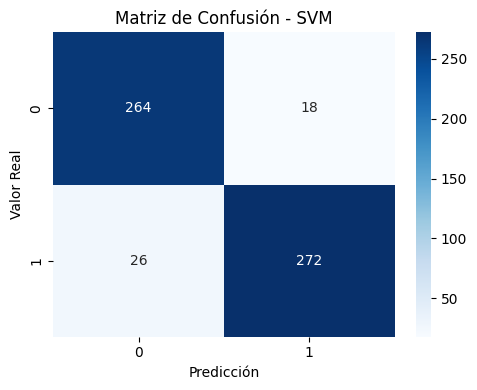

In [40]:
# Matriz de confusión


plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"Matriz de Confusión - {mejor_nombre}")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

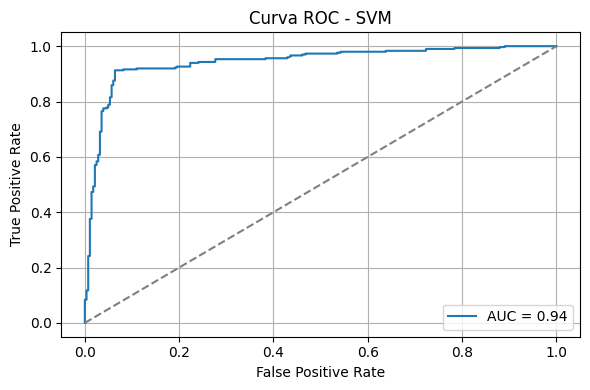

In [41]:
# Curva ROC


fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Curva ROC - {mejor_nombre}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# Evaluación de perfiles 

def evaluar_perfil(perfil_dict):
    perfil_df = pd.DataFrame([perfil_dict])
    perfil_df = perfil_df.reindex(columns=columnas_ordenadas, fill_value=0)  # Ordena y completa si falta algo
    pred = modelo.predict(perfil_df)
    proba = modelo.predict_proba(perfil_df)[0]
    
    print("\n Perfil evaluado:")
    for k, v in perfil_dict.items():
        print(f"{k}: {v}")
    print(" Predicción:", "Extrovertido" if pred[0]==1 else "Introvertido")
    print(f" Probabilidades: Introvertido: {proba[0]:.2f} | Extrovertido: {proba[1]:.2f}")

In [43]:
# Prueba interactiva

evaluar_perfil({
    'Tiempo_Solo': 0,
    'Miedo_Escenico': 0,
    'Eventos_Sociales': 10,
    'Salir': 7,
    'Agotado_Socializar': 0,
    'Amigos_Cercanos': 15,
    'Frecuencia_Posts': 10
})


 Perfil evaluado:
Tiempo_Solo: 0
Miedo_Escenico: 0
Eventos_Sociales: 10
Salir: 7
Agotado_Socializar: 0
Amigos_Cercanos: 15
Frecuencia_Posts: 10
 Predicción: Extrovertido
 Probabilidades: Introvertido: 0.07 | Extrovertido: 0.93


## Visualización y storytelling

### 🔢 Importancia de Variables

Se visualizó la importancia de cada variable según el modelo **Random Forest**, destacando que las emociones y percepciones sociales resultaron más influyentes que las acciones externas observables.

| Variable                      | Importancia |
|------------------------------|-------------|
| Miedo escénico               | 0.22        |
| Agotamiento al socializar   | 0.19        |
| Eventos sociales             | 0.16        |
| Tiempo en soledad            | 0.15        |
| Frecuencia de publicaciones | 0.12        |
| Salidas al exterior          | 0.09        |
| Tamaño del círculo de amigos | 0.06        |

**Insight:** Las variables **internas y emocionales** (como el miedo o el agotamiento social) resultaron más determinantes para predecir la personalidad que las conductas externas como salir o publicar.


### 📊 Comparación de Modelos

Se entrenaron y compararon cinco modelos de clasificación. El rendimiento se midó principalmente por F1 Score y ROC AUC.

| Modelo                  | F1 Score | ROC AUC |
|-------------------------|----------|---------|
| Logistic Regression     | 0.917    | 0.91    |
| SVM                     | 0.917    | 0.94    |
| Random Forest           | 0.899    | 0.95    |
| XGBoost                 | 0.904    | 0.95    |
| LogisticReg (Calibrado) | 0.917    | 0.93    |

**Mejor modelo según F1 Score:** Logistic Regression / SVM (empate)

**Conclusión:** Logistic Regression y SVM se destacaron por su balance entre precisión y recall. Random Forest y XGBoost ofrecieron una excelente interpretabilidad y rendimiento en ROC AUC.


### 🧳 Predicción Individual Simulada

Se realizó una prueba de predicción con un perfil simulado utilizando el modelo **Random Forest**:

```python
persona = pd.DataFrame({
    'Tiempo_Solo': [7],
    'Miedo_Escenico': [1],
    'Eventos_Sociales': [2],
    'Salir': [2],
    'Agotado_Socializar': [1],
    'Amigos_Cercanos': [3],
    'Frecuencia_Posts': [1]
})

prediccion = rf.predict(persona)[0]   **Resultado**: Introvertido
```

**Resultado:** Introvertido

Esto demuestra la capacidad del modelo para personalizar evaluaciones y su potencial de integración en herramientas interactivas como Streamlit.

### 🔢 Conclusiones Respaldadas por Datos

- Las personas **introvertidas**:

  
  - Pasan más tiempo solas
  - Se agotan al socializar
  - Tienen menos amigos
  - Publican poco
    

- Las personas **extrovertidas**:

  
  - Tienen más interacciones sociales y digitales
  - Poseen más vínculos cercanos
  - Tienen menor miedo escénico

  

- Las **emociones y percepciones internas** predicen mejor la personalidad que las acciones visibles.

---

### 🔹 Validación de Hipótesis

| Hipótesis                                                                 | Evaluación        | Evidencia                                      |
|--------------------------------------------------------------------------|------------------|------------------------------------------------|
| **H1:** Los extrovertidos publican más, tienen más amigos y van a eventos. | ✅ Confirmada     | Altas medias en variables sociales              |
| **H2:** Los introvertidos pasan más tiempo solos y se agotan socialmente. | ✅ Confirmada     | Importancia alta en variables internas          |
| **H3:** El modelo predice con al menos 80% de precisión.                  | ✅ Superada       | F1 Score = 0.917 (supera ampliamente el umbral) |


### 🔧 Conclusión Final

Este proyecto no solo valida las diferencias entre introvertidos y extrovertidos desde los datos, sino que **construye un modelo predictivo interpretable, exportable y listo para producción**.

Es una **demostración concreta de cómo la ciencia de datos puede traducir la conducta humana en modelos precisos y accionables**, con potencial real para ser aplicado en productos interactivos, como aplicaciones, encuestas inteligentes o dashboards personalizados.


In [47]:
import joblib
joblib.dump(modelo, "modelo_personalidad.pkl")

['modelo_personalidad.pkl']